Exercise Basics Data Mining
===========================



## Exercise 1: Statistical description of data



Let there be a small data set with one feature: $(8, 2, 4, 5, 1, 2, 6) = (1,2,2,4,5,6,8)$

1.  Calculate the following statistical features by hand!
    (Please do NOT use Python or any calculator, see `quantiles-handout.pdf` for a refresher on quantiles):
    -   mean value
    -   median
    -   quantile $Q_{0.25}$
    -   quantile $Q_{0.75}$

2.  Now use Python to calculate the statistical features. You can use the NumPy function `np.quantile()`
    or the member function `quantile()` of a Pandas DataFrame.

3.  Manually draw (by hand!) a histogram with bins of width 2 (bins: (0,2] , (2,4] ,&#x2026;)

4.  Now use Python to plot the histogram. Do you get the same result?



### Lösung
1. n=7
   - mean: **4**
   - median: **4**
   - quantile $Q_{0.25}$: **2**
     - $i' = q \cdot (n - 1) = 0.25 \cdot (7 - 1) = \textbf{1.5}$
     - $i = \lfloor i' \rfloor = \lfloor 1.5 \rfloor = \textbf{1}$
     - $g = [i'] = [1.5] = \textbf{0.5}$
     - $x_q = x_i + (x_{i+1} - x_i) \cdot g\implies x_{0.25} = x_1 + (x_2 - x_1) \cdot 0.5 = 2 + (2 - 1) \cdot 0.5 = \textbf{2.5}$
   - quantile $Q_{0.75}$:
     - $i' = q \cdot (n - 1) = 0.75 \cdot (7 - 1) = \textbf{4.5}$
     - $i = \lfloor i' \rfloor = \lfloor 1.5 \rfloor = \textbf{4}$
     - $g = [i'] = [1.5] = \textbf{0.5}$
     - $x_{0.75} = x_4 + (x_5 - x_4) \cdot 0.5 = 4 + (5 - 4) \cdot 0.5 = \textbf{4.5}$

[1 2 2 4 5 6 8]
q_25: 2.0
q_75: 5.5


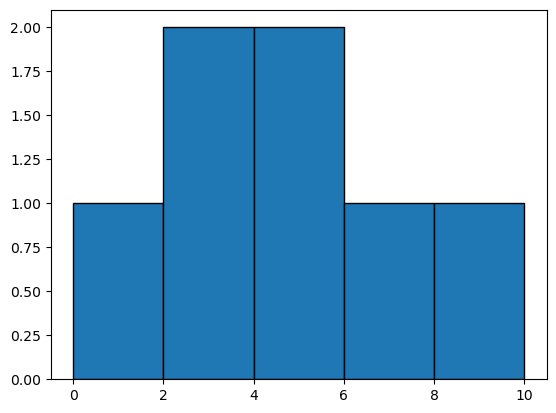

In [81]:
import numpy as np
import matplotlib.pyplot as plt

data = [8, 2, 4, 5, 1, 2, 6]
data_np = np.sort(np.array(data))

print(data_np)
print(f"q_25: {np.quantile(data_np, 0.25)}")
print(f"q_75: {np.quantile(data_np, 0.75)}")

bin_width = 2

plt.hist(data, bins=np.arange(0, max(data) + 3, 2), edgecolor="k")
plt.show()


---
## Exercise 2: Project understanding and Data understanding



First download the wine dataset from Moodle (wine.csv).
You can read a CSV with pandas using `pandas.from_csv`. Importing pandas is achieved
with



In [82]:
import pandas as pd

df = pd.read_csv("wine.csv")


Using `pd` as alias is a convention.



### Project and data understanding



**Project Goal**: Using chemical analysis to determine the origin of wines using the „wine“ data set.

Your data to solve the task:

-   3 different types of Italian wine
-   number of instances:  180
-   number of features: 13
-   number of classes: 3

-   features:
    -   Alcohol
    -   Malic acid
    -   Ash
    -   Alcalinity of ash
    -   Magnesium
    -   Total phenols
    -   Flavanoids
    -   Nonflavanoid phenols
    -   Proanthocyanins
    -   Color intensity
    -   Hue
    -   OD280/OD315 of diluted wines
    -   Proline

-   one column „class“: with the types of wine ${1, 2, 3}$

Read the csv-file with the wine data set in a Pandas data frame.

1.  Check if all data objects and features are available, compare the number of lines with the description above.
2.  Check the types of your attributes (there is one column where it does not make sense),
3.  also check for duplicates and missing values.
    If you find duplicates or missing values remove the corresponding objects.

**Hints**:

-   There is one column with a non-sense value in it.
-   If a file is read with `pd.read_csv` the types of each column are determined automatically (if possible).

It might happen that there are different types in one column.
As the documentation tells us: **Columns with mixed types are stored with the object dtype**.

-   Duplicates can be removed with the method `DataFrame.duplicated()`.
-   Missing values can be found with `DataFrame.isnull()`.
-   Missing values can dropped with `DataFrame.dropna()`.

**Important**: Check the dtype of the columns at the end. You can use the member function `astype` of a column to cast
its value (e.g. `df.Ash=df.Ash.astype(np.float64)`).



### Data understanding and preparation, visualization



There are outliers in the data set (hint: 4 obvious outliers in one column, which you will find without having any background in chemistry).

-   Find the outliers and remove the entire instances (the entire rows).
    You can use Python commands and visualization (e.g. histograms or box plots). Which outliers did you find?

**Hints**:

-   The function `DataFrame.describe()` is useful, check out the argument `percentiles`.
-   Make a boxplot of the suspicious column with the member function (`.plot.box()`).



In [83]:
print(df.isnull().sum())
df = df.dropna(how="any")  # any: drop only the affected row
# df = df.applymap(lambda x: x if x >= 0 else None)
df = df.drop_duplicates()
df = df[pd.to_numeric(df["Ash"], errors="coerce").notna()]
df["Ash"] = df["Ash"].astype(np.float64)

print(df.shape)

df.info()
df.describe(percentiles=[0.99, 0.95, 0.5, 0.05, 0.01])


class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         1
dtype: int64
(178, 14)
<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 1 to 180
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.600955,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,9.037902,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,-13.400000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
1%,1.000000,5.464000,0.897700,1.700000,11.354000,78.000000,1.138500,0.470000,0.140000,0.420000,1.863200,0.547700,1.290000,306.940000
5%,1.000000,11.637000,1.061000,1.920000,14.770000,80.850000,1.380000,0.545500,0.190000,0.730000,2.114000,0.570000,1.462500,354.550000
50%,2.000000,13.040000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
95%,3.000000,14.306000,4.455500,2.741500,25.000000,124.300000,3.274500,3.497500,0.600000,2.709000,9.598000,1.284500,3.580000,1297.250000
99%,3.000000,32.871200,5.542200,2.989000,28.500000,141.760000,3.595900,3.791400,0.630000,3.033600,11.018500,1.426900,3.843000,1522.360000
max,3.000000,94.130000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


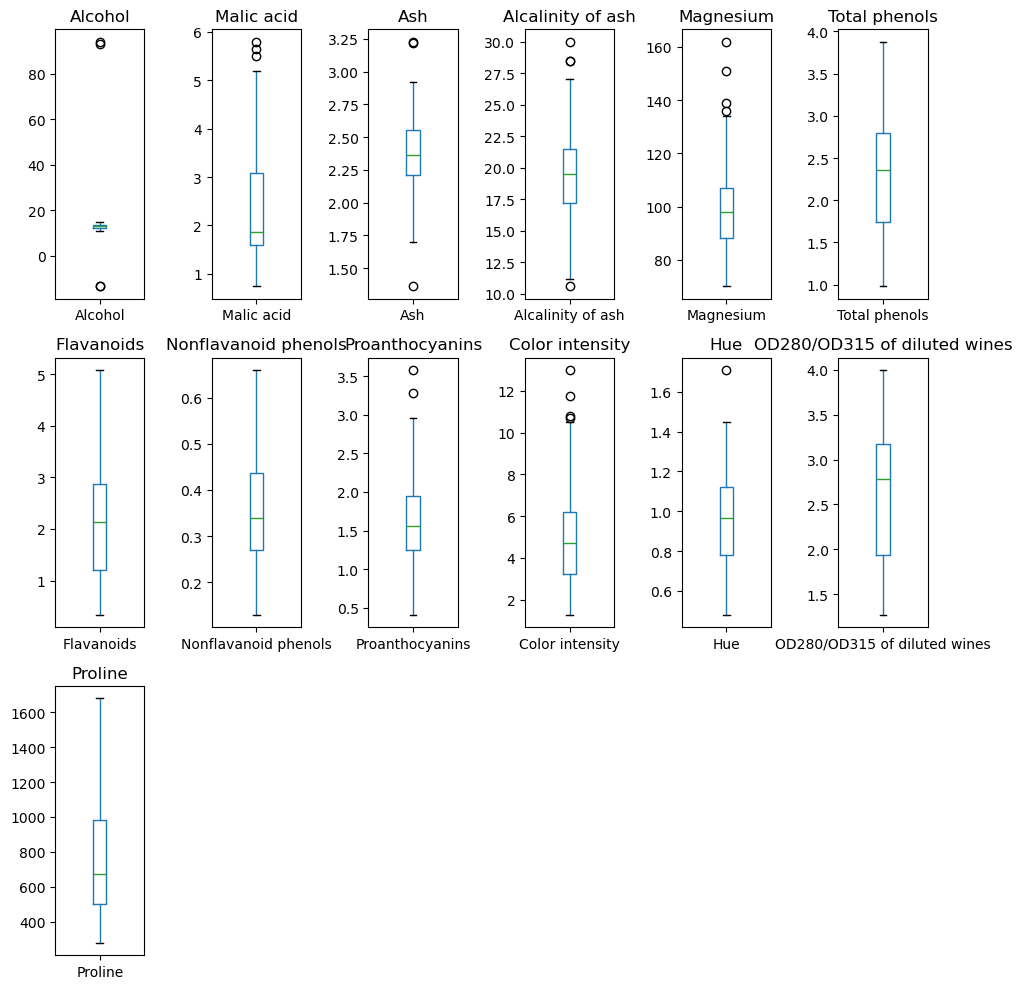

In [84]:
def multiplot(dataframe):
    df = dataframe
    columns = df.columns[df.columns != "class"]

    # Calculate the number of rows and columns for the subplot grid
    n_cols = 2  # Number of columns in the grid
    n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate the number of rows

    # Create a grid of subplots
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 10))

    # Iterate through the column names and create subplots
    for i, column in enumerate(columns):
        row, col = divmod(i, 2)  # Determine the row and column of the subplot
        ax = axes[row, col]  # Get the corresponding axis
        ax.plot(range(df.shape[0]), df[column])
        ax.set_title(column)

    # Remove empty subplots (if any)
    for i in range(len(columns), n_rows * n_cols):
        fig.delaxes(axes[divmod(i, n_cols)])

    plt.tight_layout()


# multiplot(df)


def multiboxplot(dataframe, numerical_columns, n_cols_per_row):
    n_rows = (len(numerical_columns) + n_cols_per_row - 1) // n_cols_per_row

    # Create subplots for each group of four columns
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols_per_row, figsize=(10, 10))

    # Create box plots for each group of four columns
    for i, column in enumerate(numerical_columns):
        row, col = divmod(i, n_cols_per_row)
        df[[column]].boxplot(grid=False, ax=axes[row, col])
        axes[row, col].set_title(column)

    # Remove any empty subplots
    for i in range(len(numerical_columns), n_rows * n_cols_per_row):
        fig.delaxes(axes[divmod(i, n_cols_per_row)])

    # Adjust the layout
    plt.tight_layout()


multiboxplot(df, df.columns[df.columns != "class"], 6)


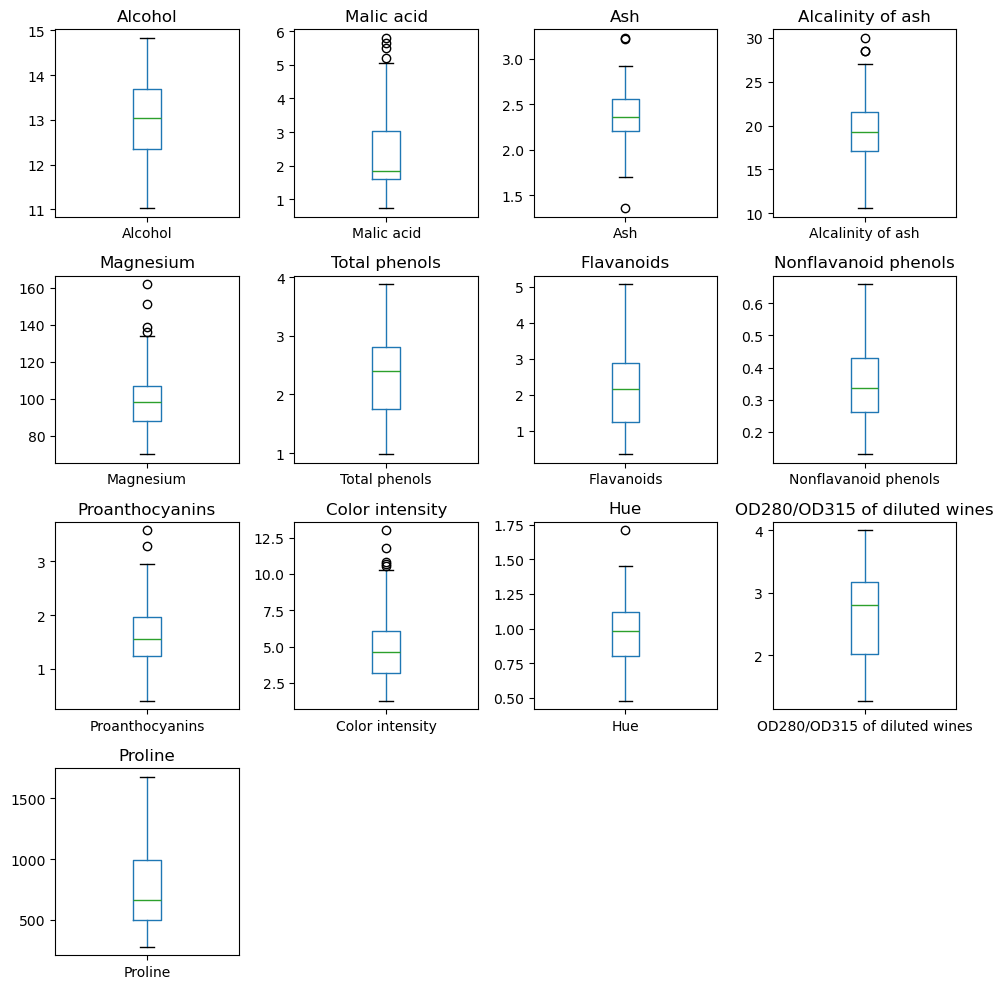

In [85]:
df = df[df["Alcohol"] >= 0]
df = df[df["Alcohol"] <= 20]  # remove alcohol outlier

# multiplot(df)
multiboxplot(df, df.columns[df.columns != "class"], 4)


---
## Exercise 3: Use simple grouping to understand and classify data

There are many features for each class. A useful  feature to classify wine
is such that it behaves differently for different classes.
First, let us check the mean of each class. Using the pandas
`groupby` function (member function of a DataFrame), you can
compute aggregate functions of groups. Use this to compute the
mean of each feature for each group (e.g., `df.groupby(COLUMN).mean()`).
If you found an interesting column, the following command
vizualizes the distribution for the different classes.



         Alcohol  Malic acid       Ash  Alcalinity of ash   Magnesium  \
class                                                                   
1      13.744746    2.010678  2.455593          17.037288  106.338983   
2      12.278732    1.932676  2.244789          20.238028   94.549296   
3      13.122955    3.298636  2.434773          21.375000   98.386364   

       Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
class                                                                     
1           2.840169    2.982373              0.290000         1.899322   
2           2.258873    2.080845              0.363662         1.630282   
3           1.670227    0.787045              0.443864         1.131818   

       Color intensity       Hue  OD280/OD315 of diluted wines      Proline  
class                                                                        
1             5.528305  1.062034                      3.157797  1115.711864  
2             3.086620  

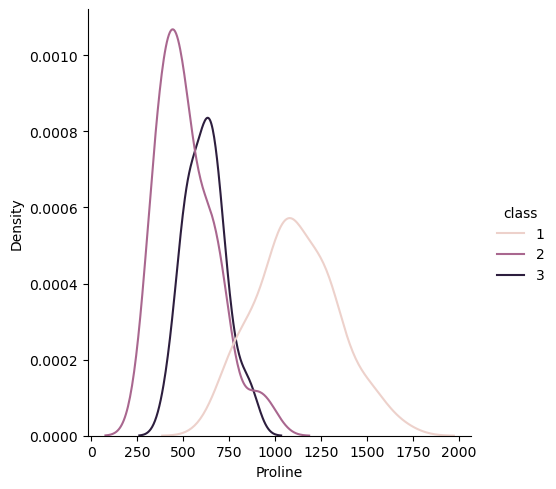

In [87]:
import seaborn as sns

print(df.groupby(df["class"]).mean())

sns.displot(data=df, x="Proline", hue="class", kind="kde")
